In [1]:
import spacy

In [2]:
nlp= spacy.load('en_core_web_md')

In [3]:
doc= nlp("The quick Brown Fox jumped the fence and fell on its face.")

In [4]:
for token in doc:
    print(token.text, token.has_vector, token.is_oov, token.vector_norm)

The True False 4.70935
quick True False 5.6573067
Brown True False 6.9202895
Fox True False 6.475194
jumped True False 6.0617995
the True False 4.70935
fence True False 6.514408
and True False 4.6577983
fell True False 6.136231
on True False 5.218119
its True False 5.6994023
face True False 6.0095043
. True False 4.9316354


In [5]:
for token in doc:
    for nekot in doc:
        print(token, nekot,token.similarity(nekot))

The The 1.0
The quick 0.36099783
The Brown 0.22069262
The Fox 0.16495615
The jumped 0.2570385
The the 0.99999994
The fence 0.28165156
The and 0.5624872
The fell 0.3612992
The on 0.49255913
The its 0.66826606
The face 0.4466118
The . 0.31135145
quick The 0.36099783
quick quick 1.0
quick Brown 0.21700898
quick Fox 0.19268584
quick jumped 0.270308
quick the 0.36099783
quick fence 0.2503833
quick and 0.38719767
quick fell 0.22557205
quick on 0.2943831
quick its 0.28537795
quick face 0.3482986
quick . 0.31971565
Brown The 0.22069262
Brown quick 0.21700898
Brown Brown 1.0
Brown Fox 0.40691158
Brown jumped 0.13434641
Brown the 0.22069262
Brown fence 0.1844475
Brown and 0.27120665
Brown fell 0.19552587
Brown on 0.22135133
Brown its 0.2102456
Brown face 0.3700311
Brown . 0.21764985
Fox The 0.16495615
Fox quick 0.19268584
Fox Brown 0.40691158
Fox Fox 1.0
Fox jumped 0.23075815
Fox the 0.16495615
Fox fence 0.28894424
Fox and 0.1470965
Fox fell 0.19737962
Fox on 0.11807698
Fox its 0.14086966
Fox fa

In [6]:
doc= nlp("Their relationship was an on-again and off-again kind of a relationship. It was amazing that it was so stupid.")

In [7]:
for token in doc:
    for nekot in doc:
        print(token, nekot,token.similarity(nekot))

Their Their 1.0
Their relationship 0.41826704
Their was 0.33137625
Their an 0.42454454
Their on 0.45514148
Their - 0.08802862
Their again 0.4786892
Their and 0.5888809
Their off 0.51623166
Their - 0.08802862
Their again 0.4786892
Their kind 0.48592147
Their of 0.5122304
Their a 0.4133744
Their relationship 0.41826704
Their . 0.28640863
Their It 0.52191925
Their was 0.33137625
Their amazing 0.39205873
Their that 0.5777722
Their it 0.52191925
Their was 0.33137625
Their so 0.54266125
Their stupid 0.3554898
Their . 0.28640863
relationship Their 0.41826704
relationship relationship 1.0
relationship was 0.3329426
relationship an 0.357563
relationship on 0.24368873
relationship - 0.05454018
relationship again 0.33059642
relationship and 0.36752042
relationship off 0.20041968
relationship - 0.05454018
relationship again 0.33059642
relationship kind 0.47775725
relationship of 0.33626783
relationship a 0.37391245
relationship relationship 1.0
relationship . 0.25248787
relationship It 0.40035084


In [8]:
res= []
for token in doc:
    for nekot in doc:
        res.append(token.similarity(nekot))
        
import matplotlib.pyplot as plt

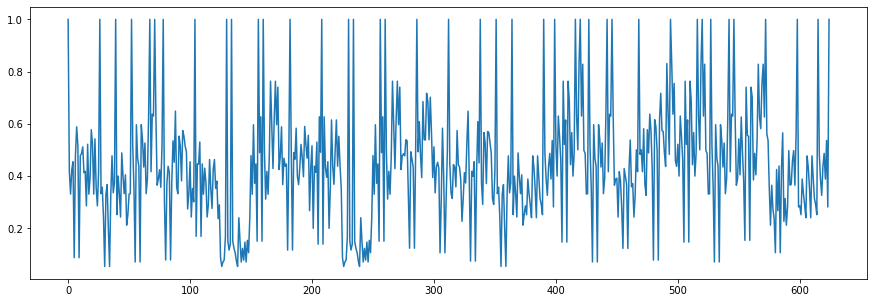

In [9]:
plt.figure(figsize=[15,5])
plt.plot(res)

In [10]:
from scipy.spatial import distance

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [11]:
distance.cosine(nlp("Are").vector,nlp("Is").vector)
               

0.47719454765319824

In [12]:
distance.cosine(nlp("Are").vector,nlp("Am").vector)

0.6995739340782166

In [13]:
distance.cosine(nlp("Am").vector,nlp("Is").vector)

0.6616911888122559

In [14]:
func= lambda vec1, vec2 : 1-distance.cosine(vec1, vec2)

In [15]:
q_=nlp("King").vector- nlp("Man").vector + nlp("Woman").vector

In [16]:
queen= nlp("Queen").vector

In [17]:
1-distance.cosine(q_,queen)

0.7880843877792358

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
sia= SentimentIntensityAnalyzer()
sia.polarity_scores("Haha! It was the best movie ever to be reviewed!")

{'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.8309}

In [20]:
import pandas as pd

In [44]:
reviews= pd.read_csv(r"D:\Asus\Documents\UPDATED_NLP_COURSE\UPDATED_NLP_COURSE\TextFiles\moviereviews.tsv", sep='\t')

In [45]:
reviews.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [46]:
reviews['label'].value_counts()

neg    1000
pos    1000
Name: label, dtype: int64

In [47]:
reviews.shape

(2000, 2)

In [48]:
reviews[(reviews.iloc[:,1].isna())]

,label,review
140,pos,NaN
208,pos,NaN
270,neg,NaN
334,neg,NaN
448,neg,NaN
522,neg,NaN
606,pos,NaN
696,neg,NaN
728,pos,NaN
738,neg,NaN


In [49]:
reviews.dropna(inplace=True)

In [50]:
reviews[(reviews.iloc[:,1].isna())]

,label,review


In [51]:
reviews.shape

(1965, 2)

In [29]:
(reviews.isna()).sum()

label     0
review    0
dtype: int64

In [53]:
spaces= []
for i,j in enumerate(reviews.iloc[:,1]):
    if j.isspace()==True:
        print(i,"Yes")
        spaces.append(i)

57 Yes
71 Yes
146 Yes
150 Yes
280 Yes
304 Yes
310 Yes
320 Yes
339 Yes
347 Yes
423 Yes
496 Yes
626 Yes
668 Yes
803 Yes
838 Yes
963 Yes
1063 Yes
1278 Yes
1430 Yes
1466 Yes
1498 Yes
1504 Yes
1730 Yes
1818 Yes
1871 Yes
1958 Yes


In [54]:
spaces

[57,
 71,
 146,
 150,
 280,
 304,
 310,
 320,
 339,
 347,
 423,
 496,
 626,
 668,
 803,
 838,
 963,
 1063,
 1278,
 1430,
 1466,
 1498,
 1504,
 1730,
 1818,
 1871,
 1958]

In [55]:
reviews.drop(index=spaces, inplace=True)

In [59]:
reviews.shape

(1938, 2)

In [61]:
sentiments=reviews['review'].apply(lambda x : sia.polarity_scores(x))

In [65]:
type(sentiments)

pandas.core.series.Series

In [68]:
sentiments[0]

{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'compound': -0.9125}

In [73]:
type(sentiments[0])

dict

In [82]:
sentiments= pd.DataFrame(sentiments)

In [83]:
sentiments.head()

,review
0,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co..."
1,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com..."
2,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com..."
3,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co..."
4,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co..."


In [97]:
jj=[]
for i in range(sentiments.shape[0]):
    jj.append(sentiments.iloc[i][0]['compound'])

In [98]:
reviews['Scores']= jj

In [99]:
reviews.head()

,label,review,Sentiment,Scores
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484


(1938, 2)